# Clustering the US Demographics most impacted by Covid-19

Steps performed in this project:

- Exploratory Data Analysis
- Feature Engineering
    - Handle Missing Values
    - One Hot Encoding
    - Scaling and Normalization
    - PCA Transformation
- Model Building and Evaluation
    - Elbow Method
    - Silhouette Coefficient
    - K-Means Clustering Model
- Result

## Exploratory Data Analysis

In [1]:
# Importing the basic libraries
import pandas as pd               # linear algebra
import seaborn as sns             # data visualization
import numpy as np                # data processing
import matplotlib.pyplot as plt   # data visualization
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Ignore and hide warnings
import warnings
warnings.filterwarnings("ignore")

# Change figure size of all the matplotlib visualizations 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [2]:
# Load the data 
dataset = pd.read_csv("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")
dataset.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,04/21/2021,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,551728.0,4290029.0,478500.0,269413.0,9071.0,768630.0,NaN
1,04/21/2021,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,63.0,23446.0,252.0,9.0,21.0,327.0,NaN
2,04/21/2021,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,266.0,41069.0,685.0,49.0,179.0,1081.0,NaN
3,04/21/2021,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,31.0,4212.0,141.0,5.0,61.0,228.0,NaN
4,04/21/2021,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,96.0,6824.0,199.0,20.0,76.0,351.0,NaN


In [3]:
# Check size of data
dataset.shape

(52326, 16)

In [4]:
# Check data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52326 entries, 0 to 52325
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data As Of                                52326 non-null  object 
 1   Start Date                                52326 non-null  object 
 2   End Date                                  52326 non-null  object 
 3   Group                                     52326 non-null  object 
 4   Year                                      49572 non-null  float64
 5   Month                                     44064 non-null  float64
 6   State                                     52326 non-null  object 
 7   Sex                                       52326 non-null  object 
 8   Age Group                                 52326 non-null  object 
 9   COVID-19 Deaths                           39881 non-null  float64
 10  Total Deaths                      

In [5]:
# Check min and max values of numeric variables
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,49572.0,2020.277778,0.447908,2020.0,2020.00,2020.0,2021.00,2021.0
Month,44064.0,5.500000,3.500040,1.0,2.75,4.5,8.25,12.0
COVID-19 Deaths,39881.0,364.395477,5043.467951,0.0,0.00,0.0,59.00,551728.0
Total Deaths,44566.0,2616.959588,37131.575871,0.0,41.00,151.0,685.75,4290029.0
Pneumonia Deaths,36449.0,348.140772,4577.582545,0.0,0.00,16.0,82.00,478500.0
Pneumonia and COVID-19 Deaths,40384.0,176.330527,2447.087386,0.0,0.00,0.0,27.00,269413.0
Influenza Deaths,42494.0,5.484986,90.017429,0.0,0.00,0.0,0.00,9071.0
"Pneumonia, Influenza, or COVID-19 Deaths",36721.0,553.513140,7325.944157,0.0,0.00,24.0,124.00,768630.0


In [6]:
dataset.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [7]:
# Clean up the columns names
col_list = ['Date_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year',
            'Month', 'State', 'Sex', 'Age_Group', 'Covid_Deaths', 'Total_Deaths',
            'Pneumonia_Deaths', 'Pneumonia_Covid_Deaths', 'Influenza_Deaths', 
            'Pneumonia_Influenza_Covid_Deaths','Footnote']
dataset.columns = col_list

In [8]:
# Droping unnecessary columns
# Drop Data_As_Of as it is today's date for the whole dataset
# Footnote as it is just notes

drop_list = ['Date_As_Of', 'Footnote']
dataset = dataset.drop(drop_list, axis=1)
dataset.head()

,Start_Date,End_Date,Group,Year,Month,State,Sex,Age_Group,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths
0,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,551728.0,4290029.0,478500.0,269413.0,9071.0,768630.0
1,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,63.0,23446.0,252.0,9.0,21.0,327.0
2,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,266.0,41069.0,685.0,49.0,179.0,1081.0
3,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,31.0,4212.0,141.0,5.0,61.0,228.0
4,01/01/2020,04/17/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,96.0,6824.0,199.0,20.0,76.0,351.0


In [9]:
# Create a temporary list comprehension of all features in which values are missing

features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

# Print % of missing values
for features in features_with_na:
    print(" {} has {} missing values and {}% missing values".
          format(features, dataset[features].isnull().sum(), np.round(dataset[features].isnull().mean()*100,3)))

 Year has 2754 missing values and 5.263% missing values
 Month has 8262 missing values and 15.789% missing values
 Covid_Deaths has 12445 missing values and 23.784% missing values
 Total_Deaths has 7760 missing values and 14.83% missing values
 Pneumonia_Deaths has 15877 missing values and 30.342% missing values
 Pneumonia_Covid_Deaths has 11942 missing values and 22.822% missing values
 Influenza_Deaths has 9832 missing values and 18.79% missing values
 Pneumonia_Influenza_Covid_Deaths has 15605 missing values and 29.823% missing values


In [10]:
# Convert Date features to datetime

dataset['Start_Date'] = pd.to_datetime(dataset['Start_Date'])
dataset['End_Date'] = pd.to_datetime(dataset['End_Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52326 entries, 0 to 52325
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Start_Date                        52326 non-null  datetime64[ns]
 1   End_Date                          52326 non-null  datetime64[ns]
 2   Group                             52326 non-null  object        
 3   Year                              49572 non-null  float64       
 4   Month                             44064 non-null  float64       
 5   State                             52326 non-null  object        
 6   Sex                               52326 non-null  object        
 7   Age_Group                         52326 non-null  object        
 8   Covid_Deaths                      39881 non-null  float64       
 9   Total_Deaths                      44566 non-null  float64       
 10  Pneumonia_Deaths                  36449 non-nu

In [11]:
# Check number of categories in each categorical variable
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Group and number of categories are 3
The feature is State and number of categories are 54
The feature is Sex and number of categories are 3
The feature is Age_Group and number of categories are 17


In [12]:
# Keep only "By Month" group data

data_modified=dataset[dataset.Group == 'By Month']
data_modified.head()

,Start_Date,End_Date,Group,Year,Month,State,Sex,Age_Group,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths
8262,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,All Sexes,All Ages,4.0,264624.0,17903.0,3.0,2122.0,20026.0
8263,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1780.0,41.0,0.0,8.0,49.0
8264,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,All Sexes,0-17 years,0.0,2960.0,90.0,0.0,63.0,153.0
8265,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0
8266,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,All Sexes,5-14 years,0.0,470.0,21.0,0.0,29.0,50.0


In [13]:
data_modified.isna().sum()

Start_Date                              0
End_Date                                0
Group                                   0
Year                                    0
Month                                   0
State                                   0
Sex                                     0
Age_Group                               0
Covid_Deaths                        10665
Total_Deaths                         7433
Pneumonia_Deaths                    13819
Pneumonia_Covid_Deaths              10259
Influenza_Deaths                     6818
Pneumonia_Influenza_Covid_Deaths    13703
dtype: int64

In [14]:
drop_list_new = ['Start_Date', 'End_Date', 'Group']
data_modified = data_modified.drop(drop_list_new, axis=1)
data_modified.head()

,Year,Month,State,Sex,Age_Group,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths
8262,2020.0,1.0,United States,All Sexes,All Ages,4.0,264624.0,17903.0,3.0,2122.0,20026.0
8263,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1780.0,41.0,0.0,8.0,49.0
8264,2020.0,1.0,United States,All Sexes,0-17 years,0.0,2960.0,90.0,0.0,63.0,153.0
8265,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0
8266,2020.0,1.0,United States,All Sexes,5-14 years,0.0,470.0,21.0,0.0,29.0,50.0


In [15]:
# Check number of categories in each categorical variable
categorical_feature=[feature for feature in data_modified.columns if data_modified[feature].dtypes=='O']

for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_modified[feature].unique())))

The feature is State and number of categories are 54
The feature is Sex and number of categories are 3
The feature is Age_Group and number of categories are 17


In [16]:
# Remove data of "All Sexes" and " United States" group data

data_modified=data_modified[data_modified.Sex != 'All Sexes']
data_modified=data_modified[data_modified.State != 'United States']
data_modified=data_modified[data_modified.Age_Group != 'All Ages']
data_modified.head()

,Year,Month,State,Sex,Age_Group,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths
9096,2020.0,1.0,Alabama,Male,Under 1 year,0.0,17.0,0.0,0.0,0.0,0.0
9097,2020.0,1.0,Alabama,Male,0-17 years,0.0,44.0,0.0,0.0,NaN,NaN
9098,2020.0,1.0,Alabama,Male,1-4 years,0.0,NaN,0.0,0.0,0.0,0.0
9099,2020.0,1.0,Alabama,Male,5-14 years,0.0,11.0,0.0,0.0,0.0,0.0
9100,2020.0,1.0,Alabama,Male,15-24 years,0.0,43.0,0.0,0.0,NaN,NaN


In [17]:
# Check number of categories in each categorical variable
categorical_feature=[feature for feature in data_modified.columns if data_modified[feature].dtypes=='O']

for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data_modified[feature].unique())))

The feature is State and number of categories are 53
The feature is Sex and number of categories are 2
The feature is Age_Group and number of categories are 16


In [18]:
data_modified.isnull().sum()

Year                                   0
Month                                  0
State                                  0
Sex                                    0
Age_Group                              0
Covid_Deaths                        7027
Total_Deaths                        5597
Pneumonia_Deaths                    9203
Pneumonia_Covid_Deaths              6618
Influenza_Deaths                    3558
Pneumonia_Influenza_Covid_Deaths    9198
dtype: int64

<BarContainer object of 27136 artists>

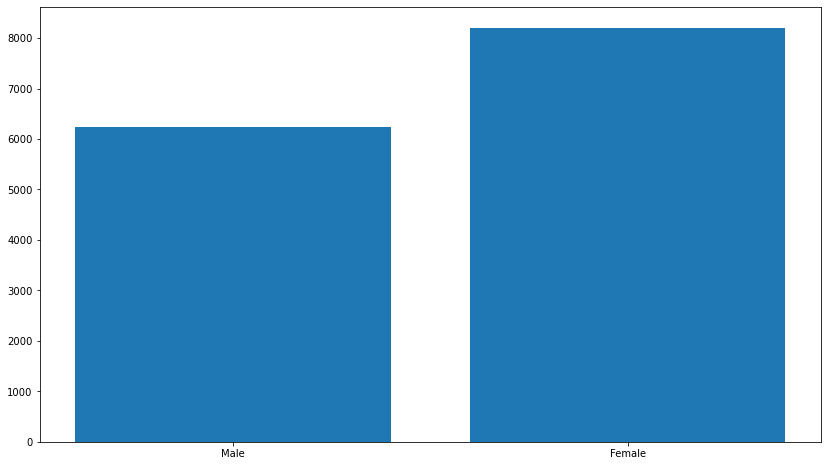

In [19]:
plt.bar(data_modified['Sex'],data_modified['Total_Deaths'])

<BarContainer object of 27136 artists>

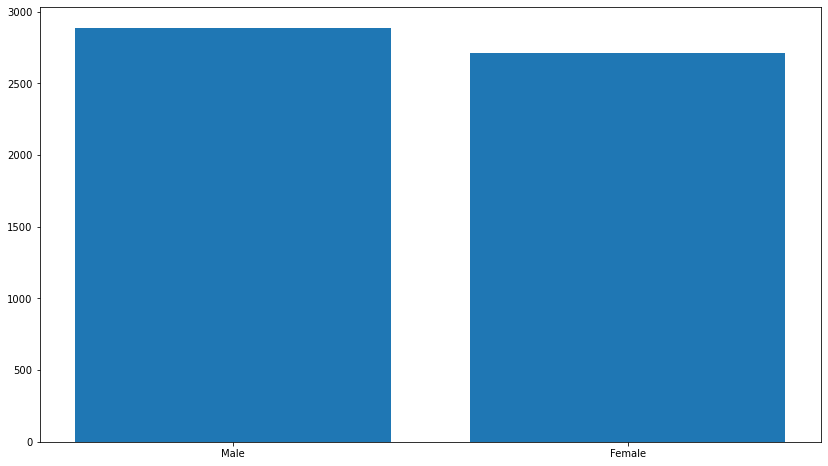

In [20]:
plt.bar(data_modified['Sex'],data_modified['Covid_Deaths'])

<BarContainer object of 27136 artists>

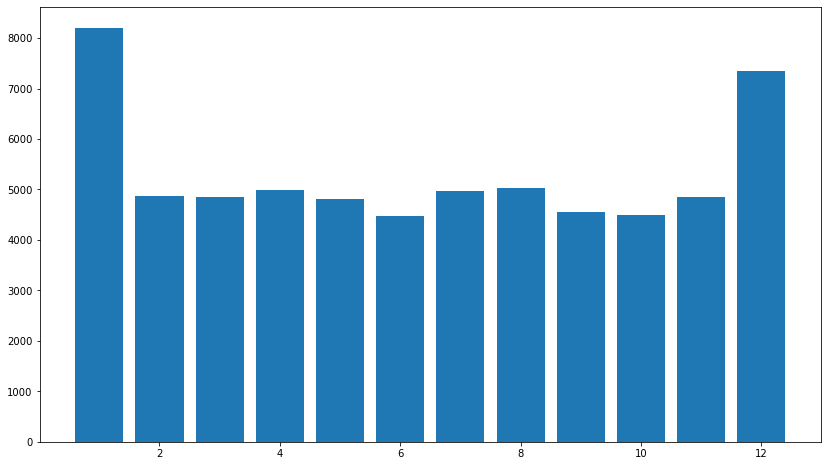

In [21]:
plt.bar(data_modified['Month'],data_modified['Total_Deaths'])

<BarContainer object of 27136 artists>

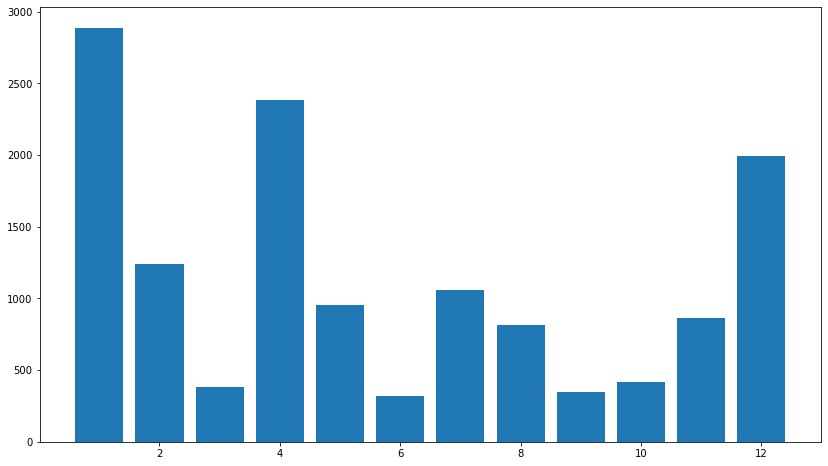

In [22]:
plt.bar(data_modified['Month'],data_modified['Covid_Deaths'])

<BarContainer object of 27136 artists>

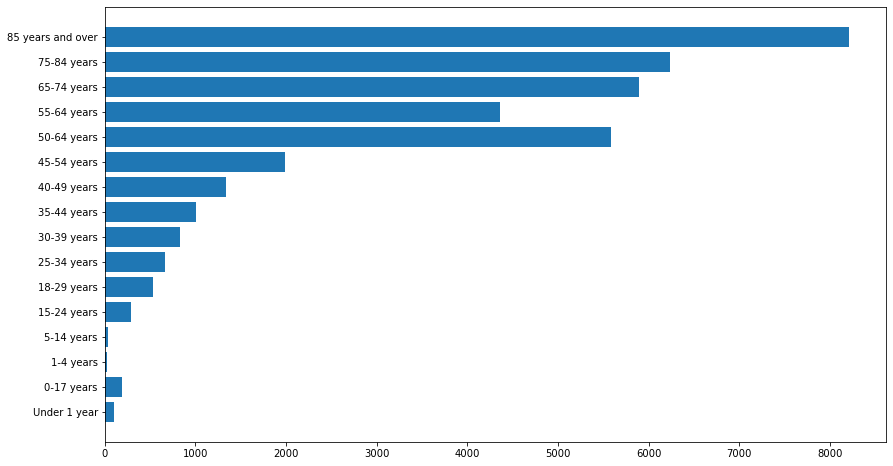

In [23]:
plt.barh(data_modified['Age_Group'],data_modified['Total_Deaths'])

<BarContainer object of 27136 artists>

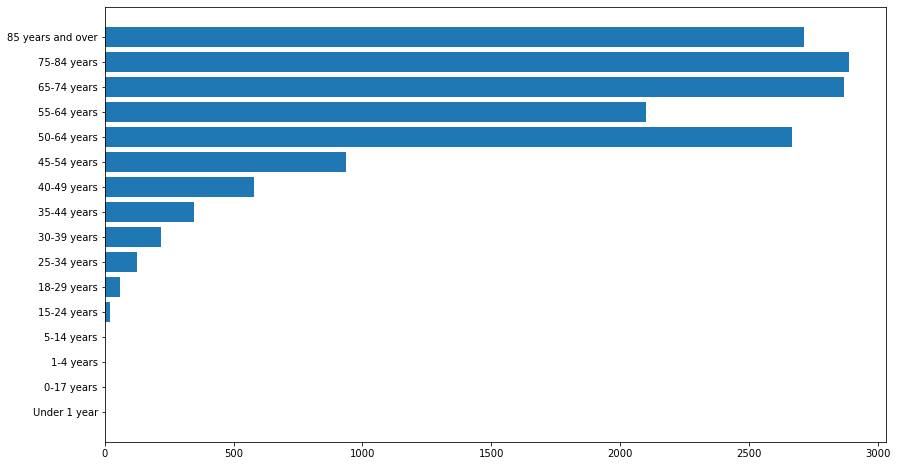

In [24]:
plt.barh(data_modified['Age_Group'],data_modified['Covid_Deaths'])

<BarContainer object of 27136 artists>

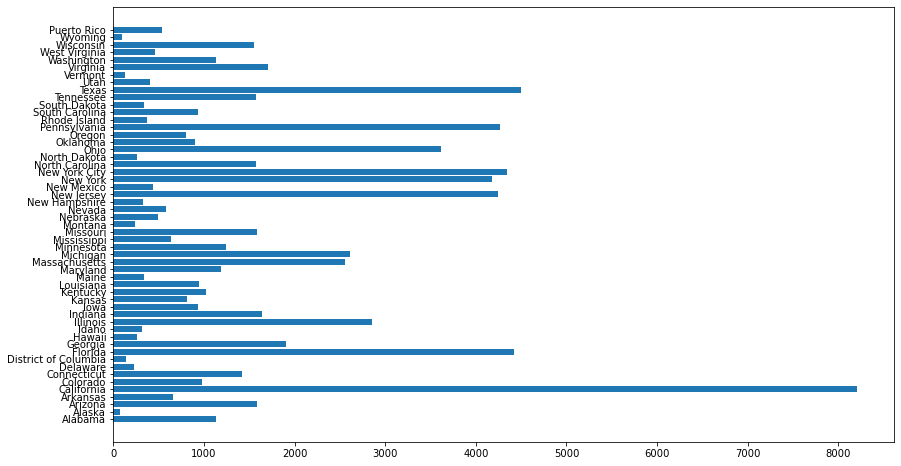

In [25]:
plt.barh(data_modified['State'],data_modified['Total_Deaths'])

<BarContainer object of 27136 artists>

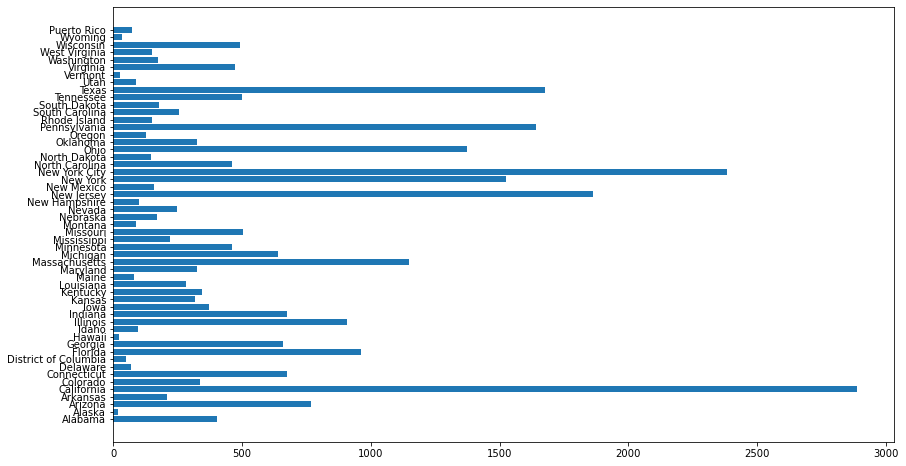

In [19]:
plt.barh(data_modified['State'],data_modified['Covid_Deaths'])

## Feature Engineering

### Handle Missing Values

In [20]:
data_modified.isnull().sum()

Year                                   0
Month                                  0
State                                  0
Sex                                    0
Age_Group                              0
Covid_Deaths                        7027
Total_Deaths                        5597
Pneumonia_Deaths                    9203
Pneumonia_Covid_Deaths              6618
Influenza_Deaths                    3558
Pneumonia_Influenza_Covid_Deaths    9198
dtype: int64

In [21]:
data_modified.fillna(0, inplace=True)

In [22]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27136 entries, 9096 to 52325
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              27136 non-null  float64
 1   Month                             27136 non-null  float64
 2   State                             27136 non-null  object 
 3   Sex                               27136 non-null  object 
 4   Age_Group                         27136 non-null  object 
 5   Covid_Deaths                      27136 non-null  float64
 6   Total_Deaths                      27136 non-null  float64
 7   Pneumonia_Deaths                  27136 non-null  float64
 8   Pneumonia_Covid_Deaths            27136 non-null  float64
 9   Influenza_Deaths                  27136 non-null  float64
 10  Pneumonia_Influenza_Covid_Deaths  27136 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.5+ MB


### One Hot Encoding

In [23]:
sex=pd.get_dummies(data_modified['Sex'])
age=pd.get_dummies(data_modified['Age_Group'])

data_modified=data_modified.drop(['Sex', 'Age_Group'], axis=1)
data_modified=pd.concat([data_modified, sex, age], axis=1)

data_modified.head()

,Year,Month,State,Covid_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_Covid_Deaths,Influenza_Deaths,Pneumonia_Influenza_Covid_Deaths,Female,Male,0-17 years,1-4 years,15-24 years,18-29 years,25-34 years,30-39 years,35-44 years,40-49 years,45-54 years,5-14 years,50-64 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 1 year
9096,2020.0,1.0,Alabama,0.0,17.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9097,2020.0,1.0,Alabama,0.0,44.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9098,2020.0,1.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9099,2020.0,1.0,Alabama,0.0,11.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9100,2020.0,1.0,Alabama,0.0,43.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
state=pd.get_dummies(data_modified['State'])

data_modified=data_modified.drop(['State'], axis=1)
data_modified=pd.concat([data_modified, state], axis=1)

In [25]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27136 entries, 9096 to 52325
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              27136 non-null  float64
 1   Month                             27136 non-null  float64
 2   Covid_Deaths                      27136 non-null  float64
 3   Total_Deaths                      27136 non-null  float64
 4   Pneumonia_Deaths                  27136 non-null  float64
 5   Pneumonia_Covid_Deaths            27136 non-null  float64
 6   Influenza_Deaths                  27136 non-null  float64
 7   Pneumonia_Influenza_Covid_Deaths  27136 non-null  float64
 8   Female                            27136 non-null  uint8  
 9   Male                              27136 non-null  uint8  
 10  0-17 years                        27136 non-null  uint8  
 11  1-4 years                         27136 non-null  uint8  
 12  1

In [26]:
# As we are only focusing on Covid Deaths, so droping other death rates
drop_list_new = ['Total_Deaths', 'Pneumonia_Deaths', 'Pneumonia_Covid_Deaths', 'Influenza_Deaths', 'Pneumonia_Influenza_Covid_Deaths']
data_modified = data_modified.drop(drop_list_new, axis=1)
data_modified.head()

,Year,Month,Covid_Deaths,Female,Male,0-17 years,1-4 years,15-24 years,18-29 years,25-34 years,30-39 years,35-44 years,40-49 years,45-54 years,5-14 years,50-64 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 1 year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,New York City,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
9096,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9097,2020.0,1.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9098,2020.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9099,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9100,2020.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Copy the cleaned and handled data to new dataset
cleaned_dataset=data_modified
cleaned_dataset.head()

,Year,Month,Covid_Deaths,Female,Male,0-17 years,1-4 years,15-24 years,18-29 years,25-34 years,30-39 years,35-44 years,40-49 years,45-54 years,5-14 years,50-64 years,55-64 years,65-74 years,75-84 years,85 years and over,Under 1 year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,New York City,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
9096,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9097,2020.0,1.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9098,2020.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9099,2020.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9100,2020.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling and Normalization

In [28]:
# Standardize data
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cleaned_dataset) 
  
scaled_df

array([[-0.57735027, -1.28571429, -0.23262883, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [-0.57735027, -1.28571429, -0.23262883, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [-0.57735027, -1.28571429, -0.23262883, ..., -0.13867505,
        -0.13867505, -0.13867505],
       ...,
       [ 1.73205081, -0.42857143, -0.23262883, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [ 1.73205081, -0.42857143, -0.23262883, ..., -0.13867505,
        -0.13867505, -0.13867505],
       [ 1.73205081, -0.42857143, -0.23262883, ..., -0.13867505,
        -0.13867505, -0.13867505]])

In [29]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,-0.067555,-0.150440,-0.027220,-0.117009,0.117009,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,0.453173,0.843762,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226
1,-0.067555,-0.150440,-0.027220,-0.117009,0.117009,0.453173,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,0.843762,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226
2,-0.067555,-0.150440,-0.027220,-0.117009,0.117009,-0.030212,0.453173,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,0.843762,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226
3,-0.067555,-0.150440,-0.027220,-0.117009,0.117009,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,0.453173,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,0.843762,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226
4,-0.067555,-0.150440,-0.027220,-0.117009,0.117009,-0.030212,-0.030212,0.453173,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,-0.030212,0.843762,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226,-0.016226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Principal Component Analysis

In [30]:
# Principal component analysis (PCA) is a technique to bring out strong patterns in a dataset by supressing variations.
# It is used to clean data sets to make it easy to explore and analyse. 

from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 

X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.165748,0.082275
1,-0.166663,0.052462
2,-0.164357,0.064386
3,-0.170858,0.072047
4,-0.161335,0.078012


## Model Building and Evaluation

- K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
- K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

### Elbow Method

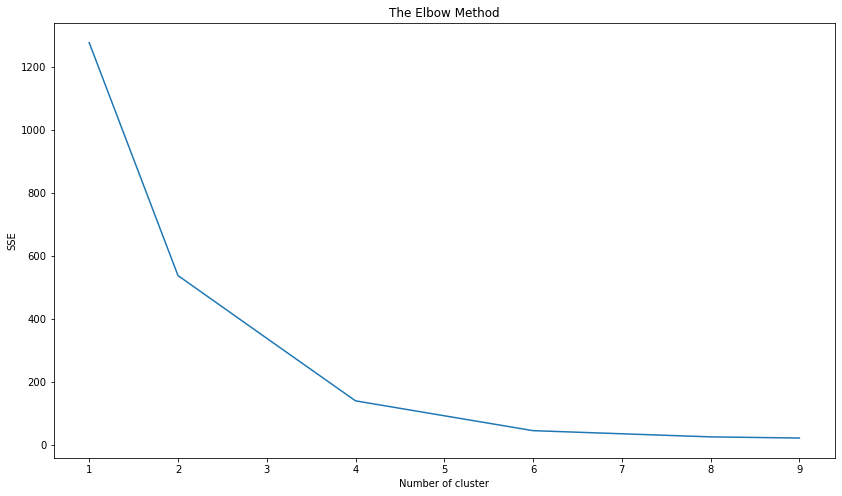

In [31]:
# Elbow method is used to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10).
# For each value of k, we calculate sum of squared errors (SSE) and 
# the point where the SSE starts to flatten out is the required k value.

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Silhouette Coefficient

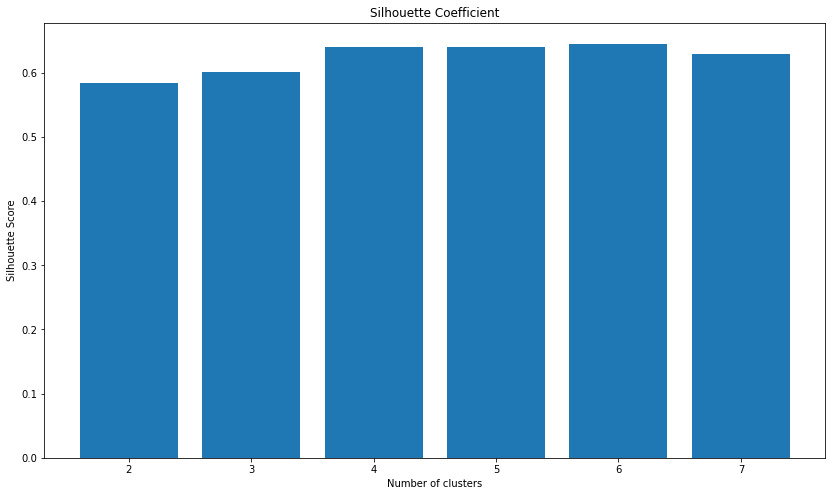

In [32]:
# K-Means clustering can then be evaluated using Silhouette Coefficient.
# A higher Silhouette Coefficient score relates to a model with better-defined clusters.

from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

From the Elbow method and Silhouette Coefficient, it is clear that k=4 is the best value in this case.

### K-Means Clustering Model

In [33]:
# Using k=4 to make the KMeans model

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)

KMeans(n_clusters=4)

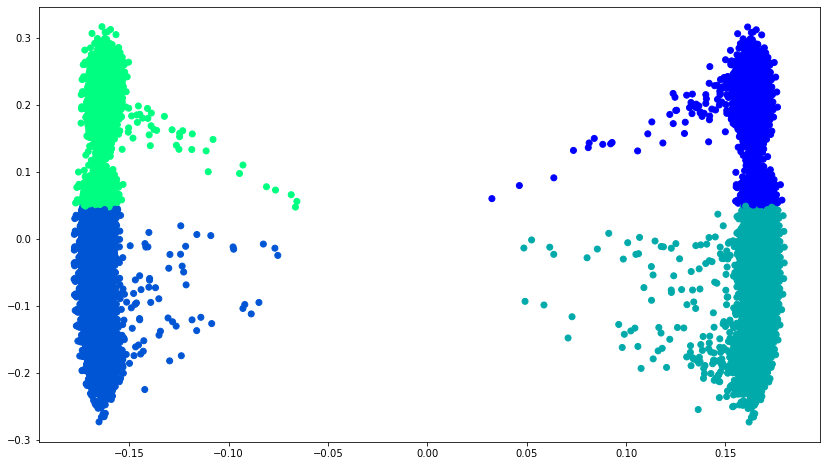

In [34]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

In [35]:
labels=kmeans.labels_
clusters=pd.concat([cleaned_dataset, pd.DataFrame({'cluster':labels})], axis=1)

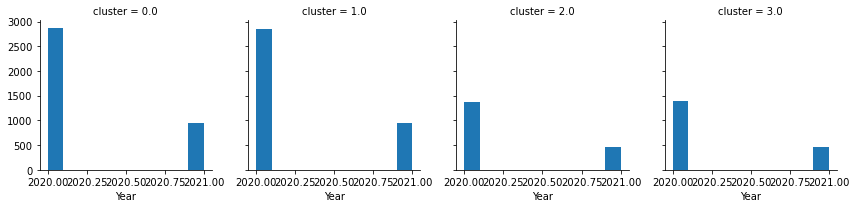

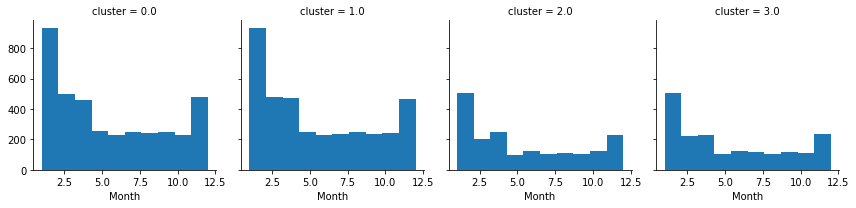

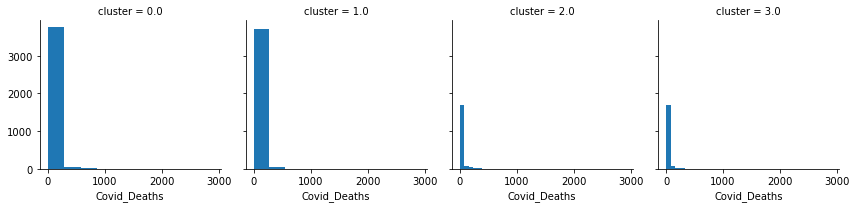

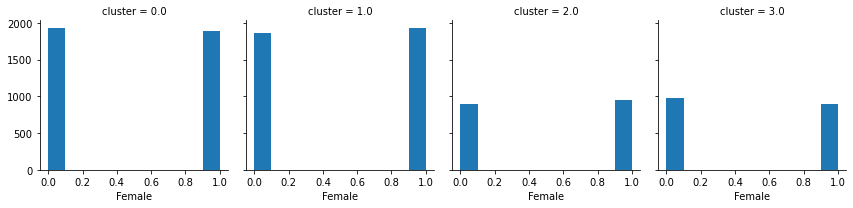

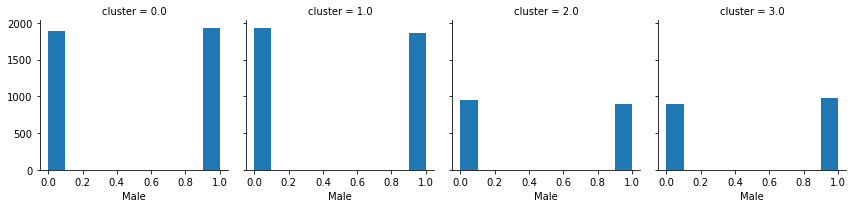

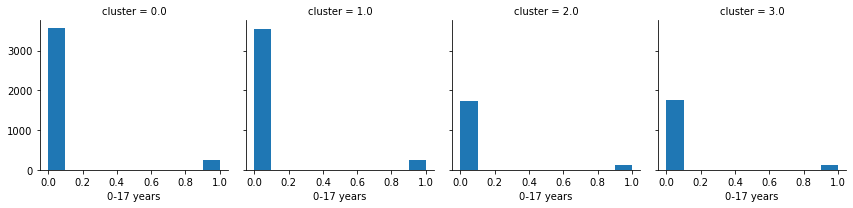

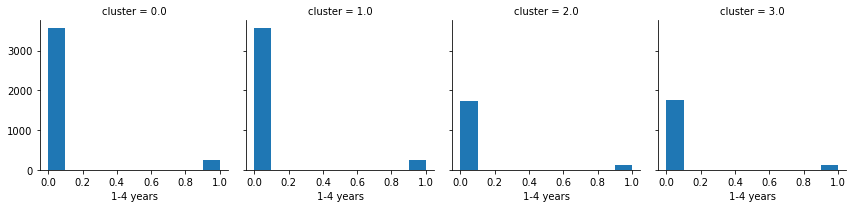

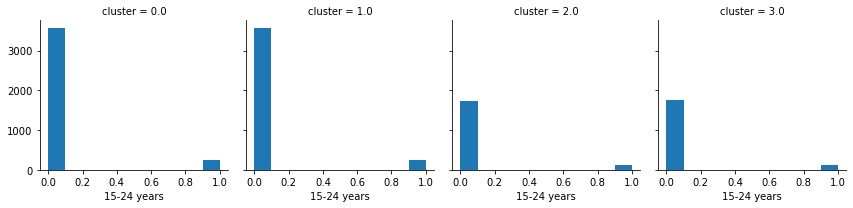

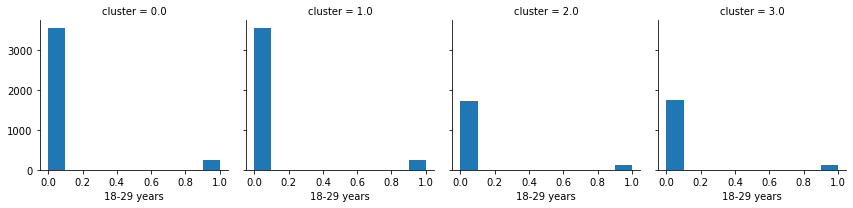

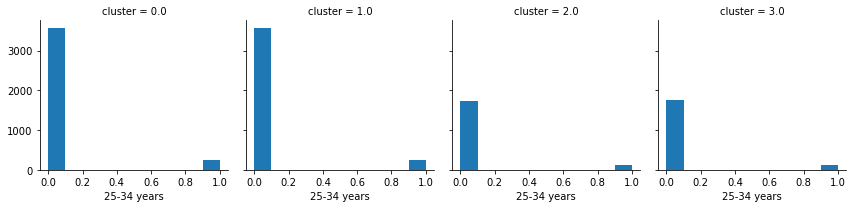

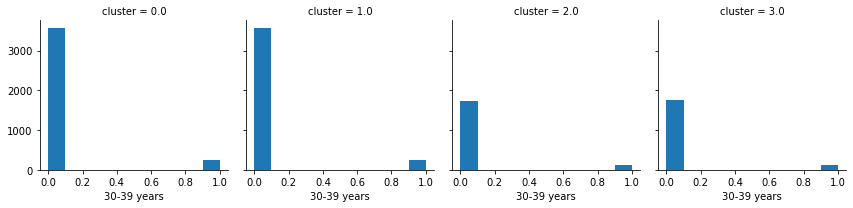

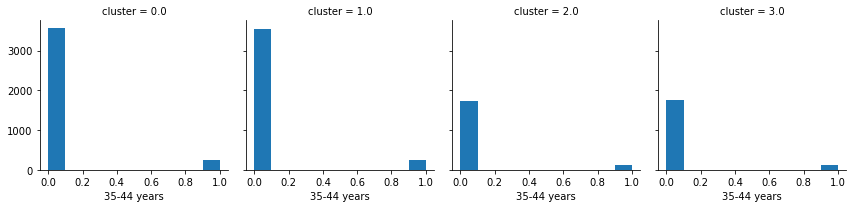

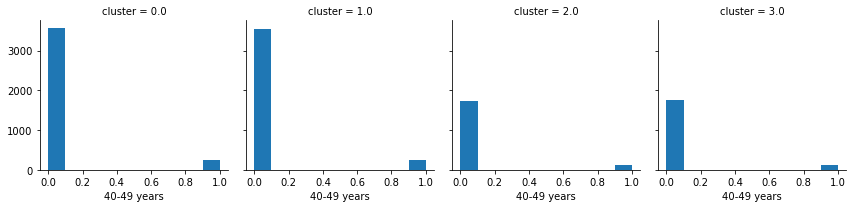

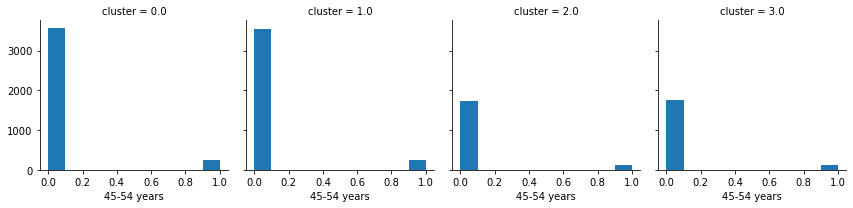

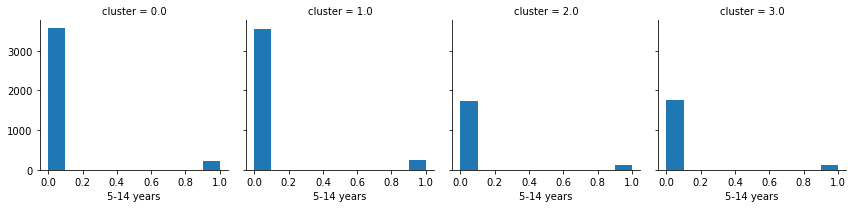

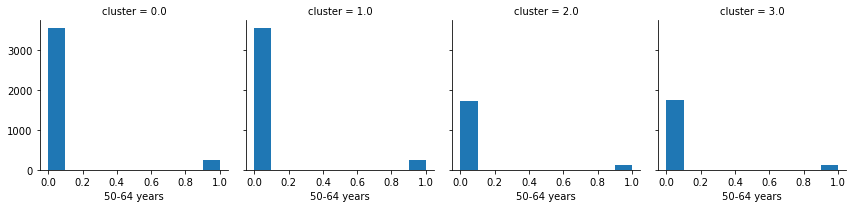

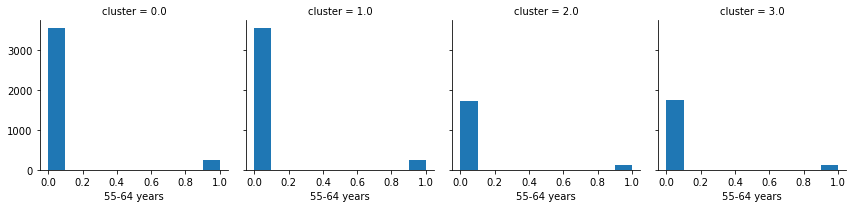

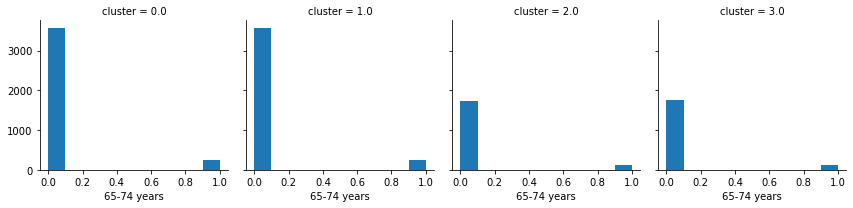

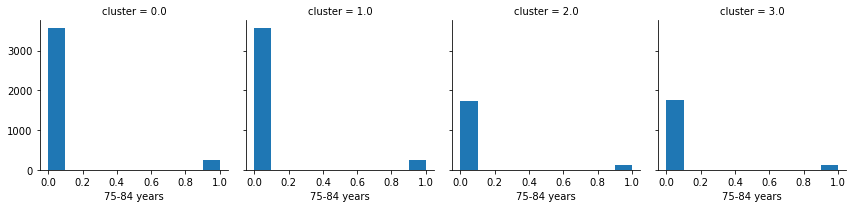

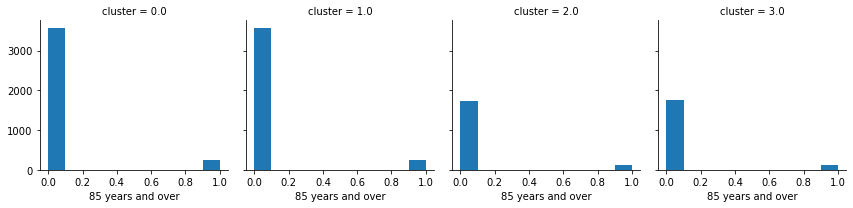

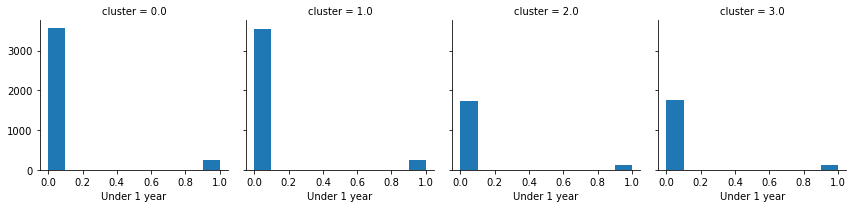

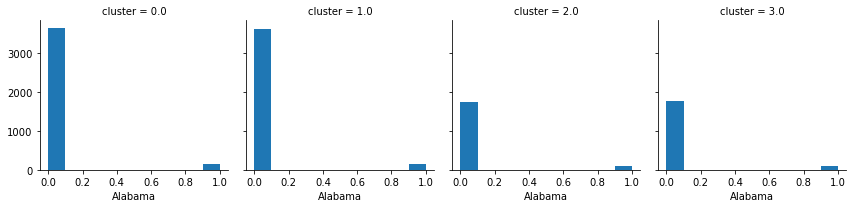

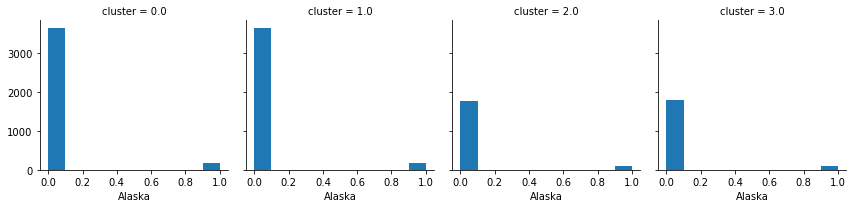

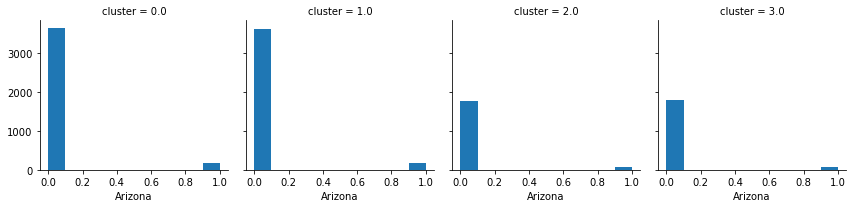

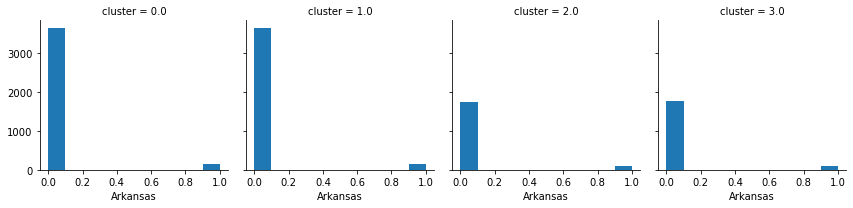

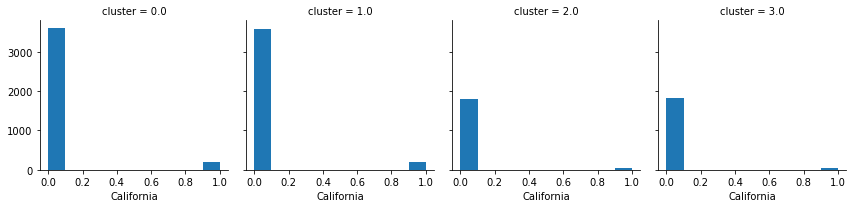

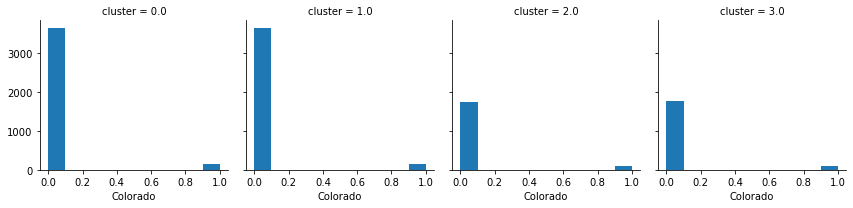

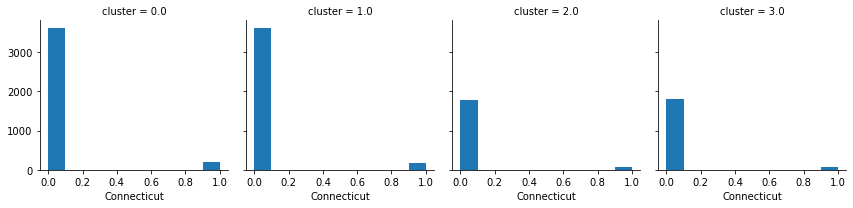

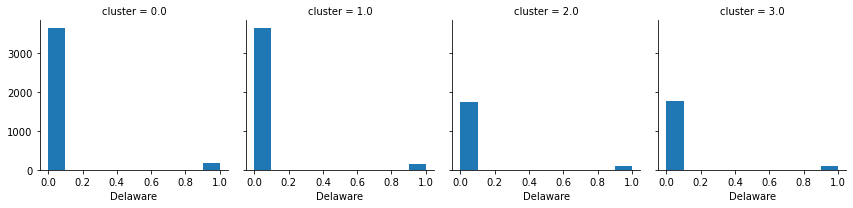

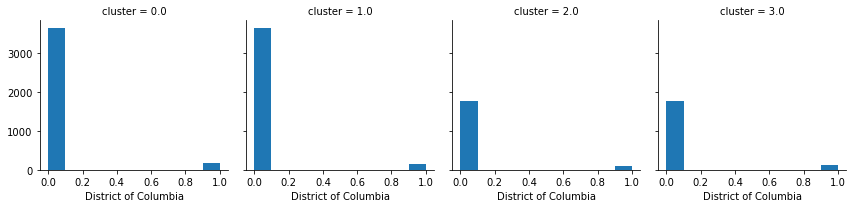

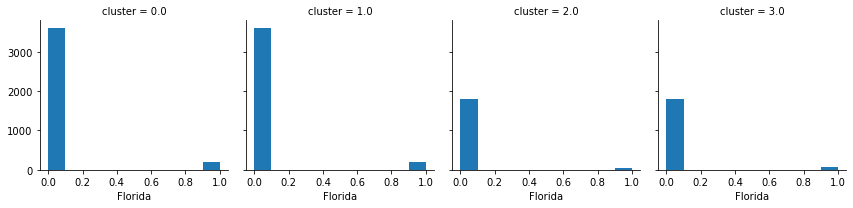

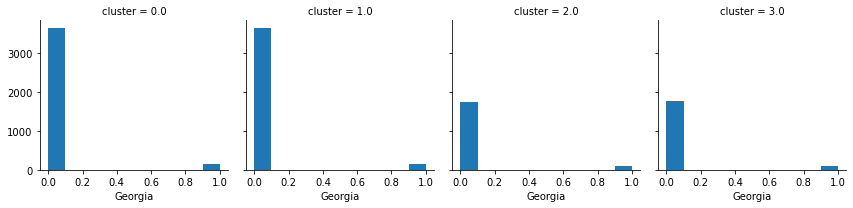

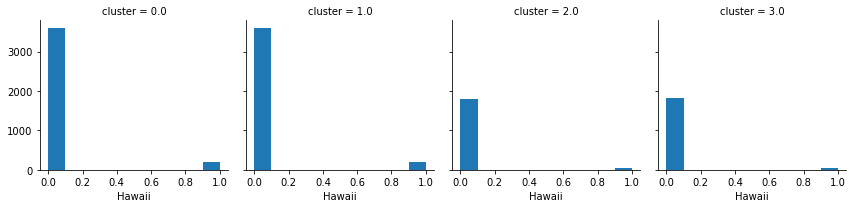

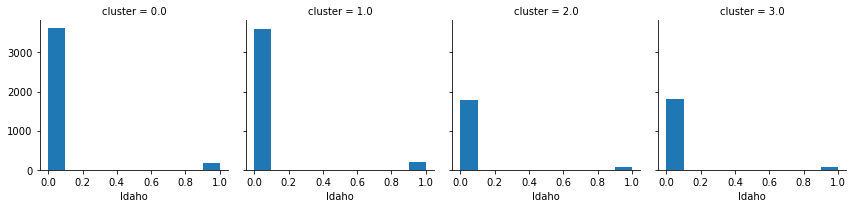

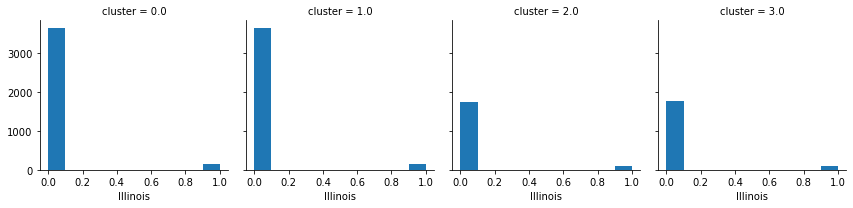

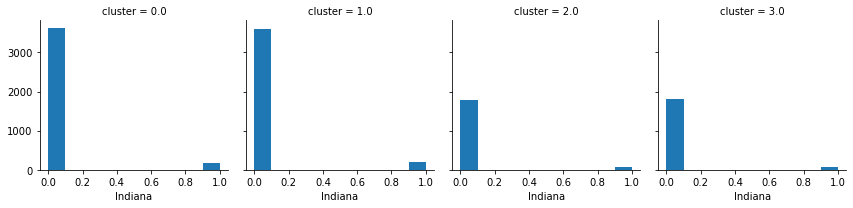

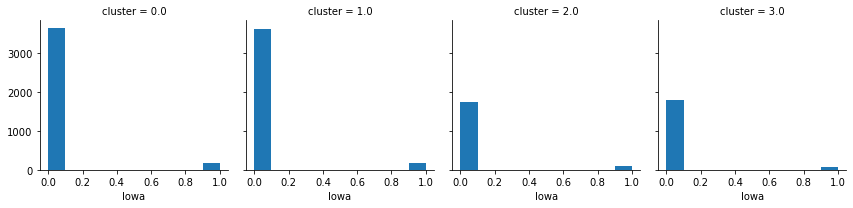

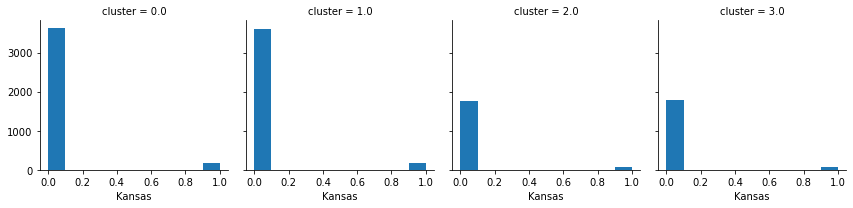

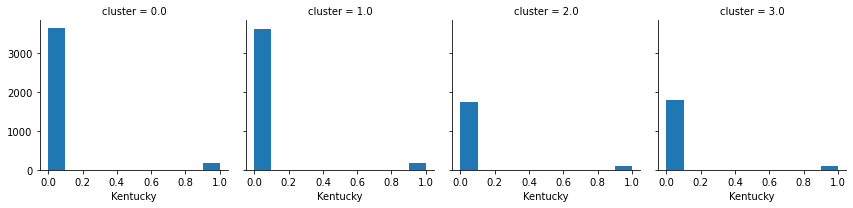

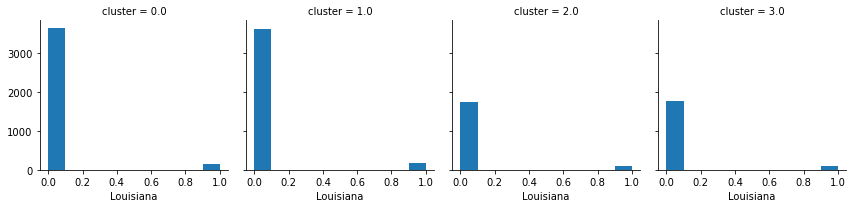

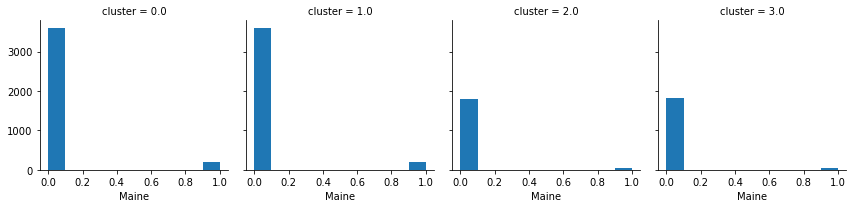

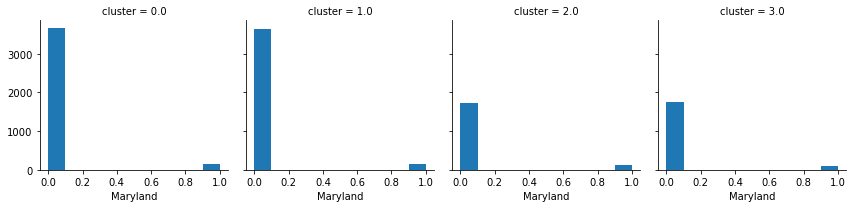

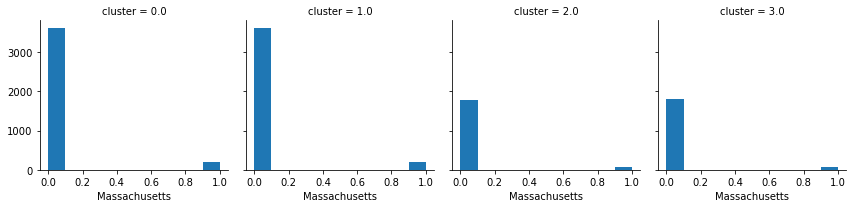

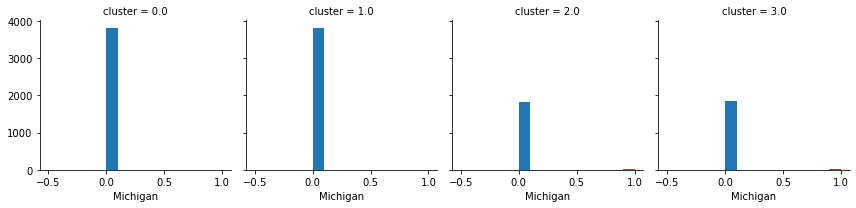

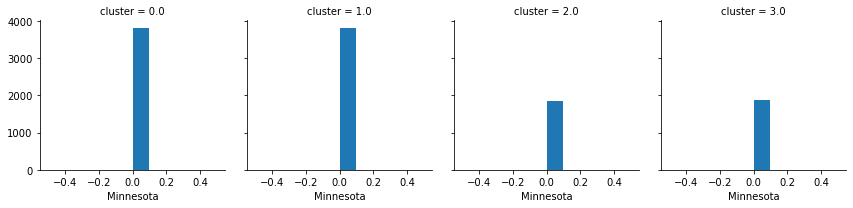

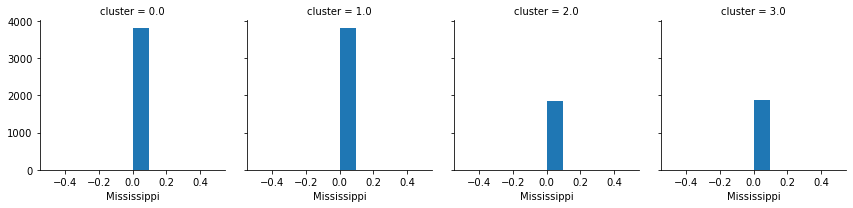

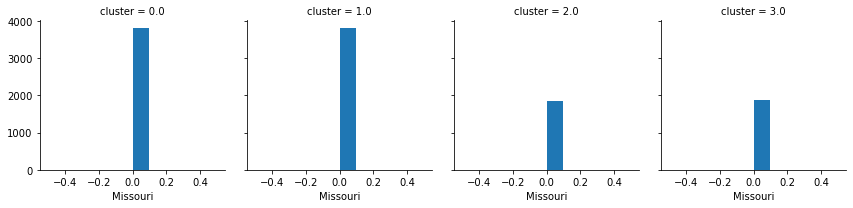

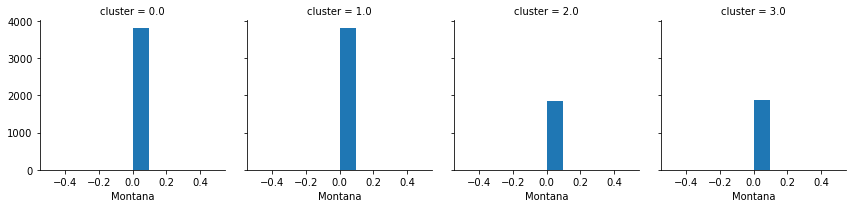

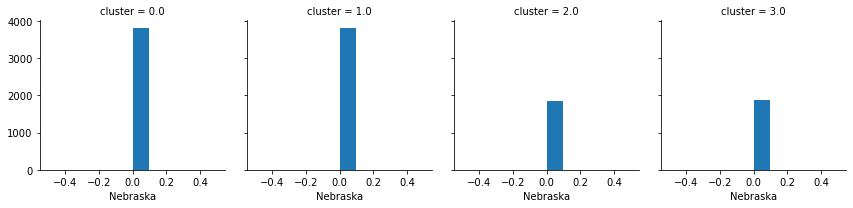

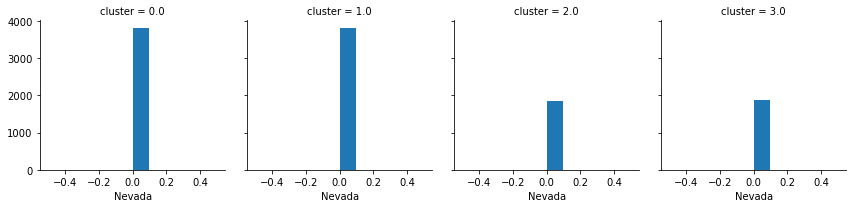

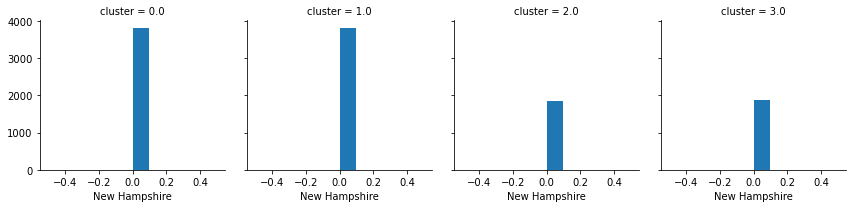

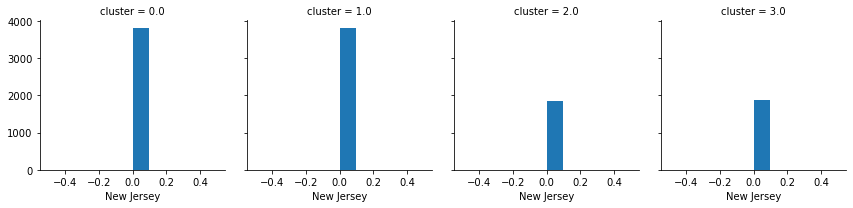

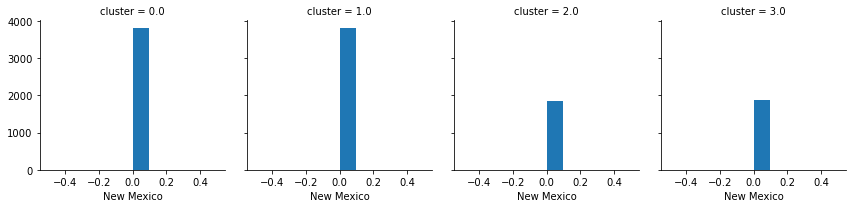

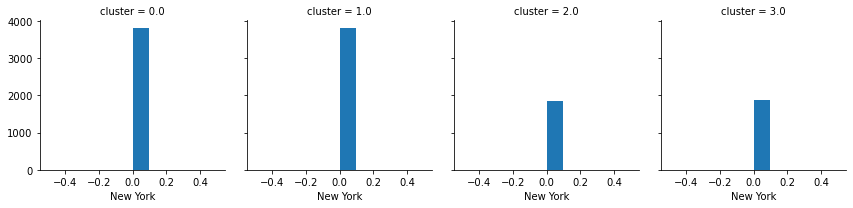

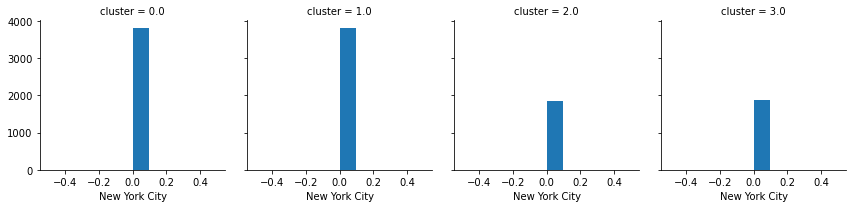

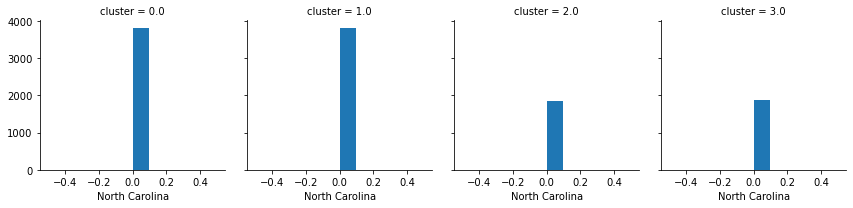

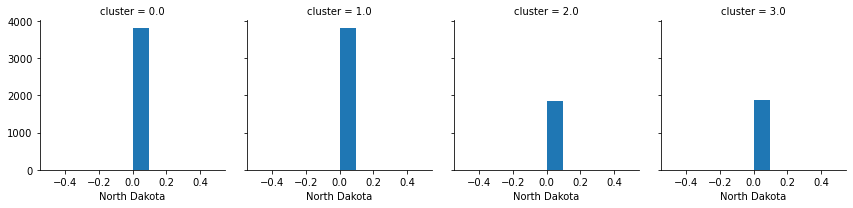

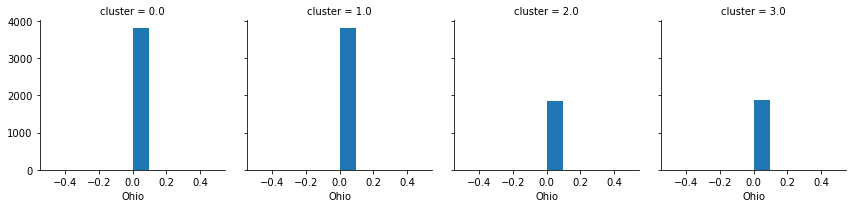

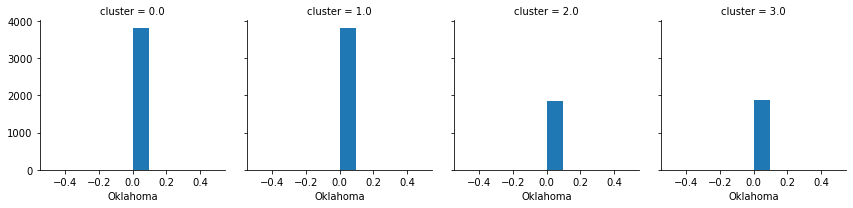

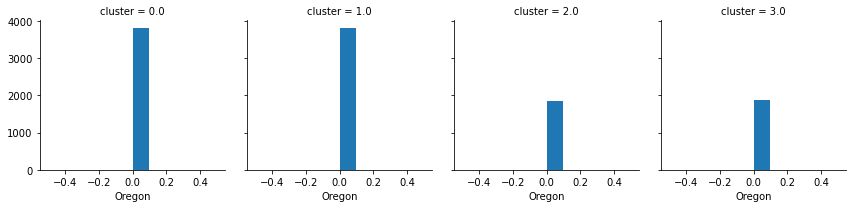

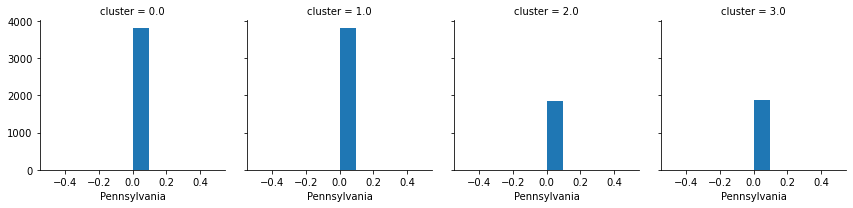

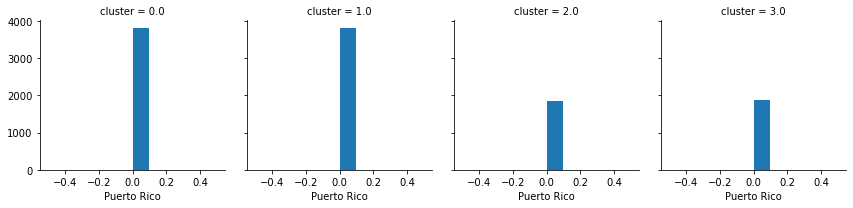

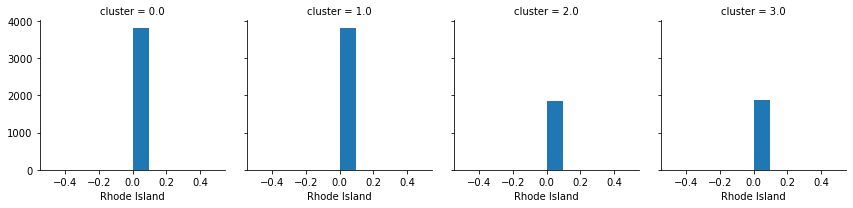

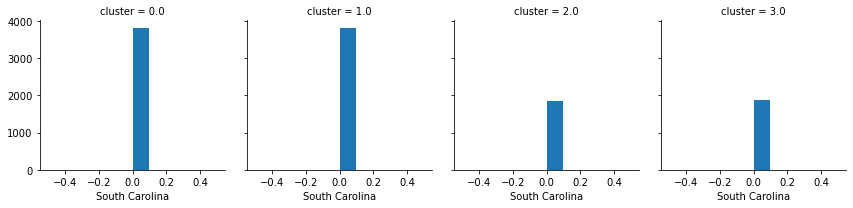

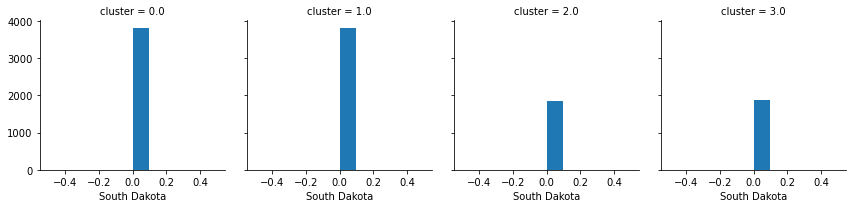

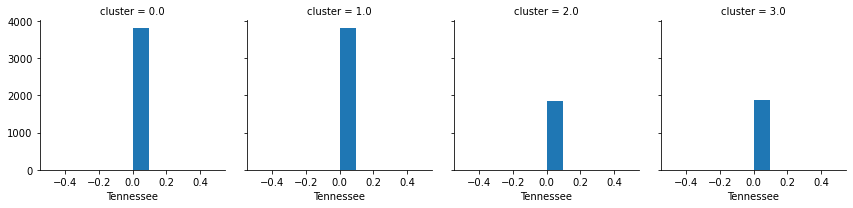

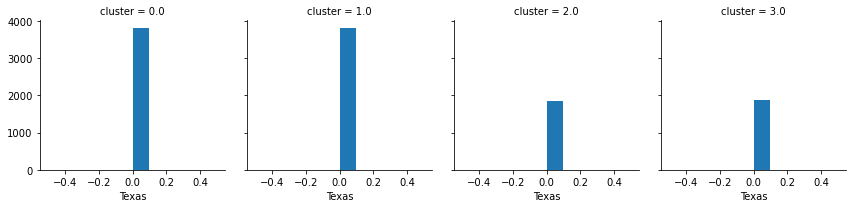

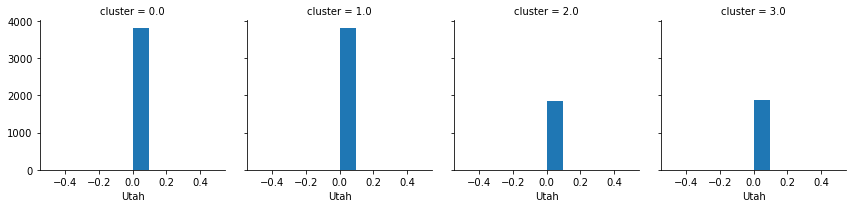

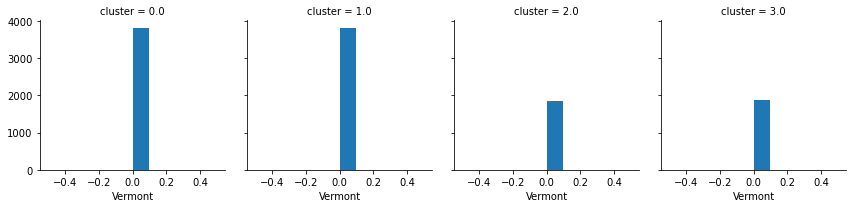

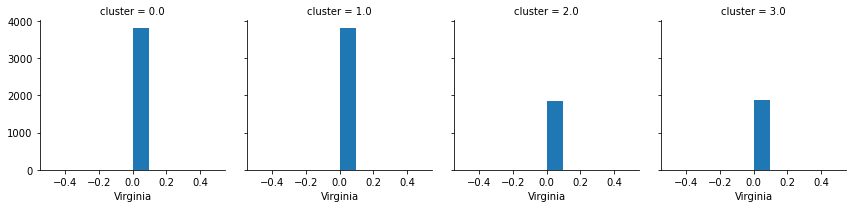

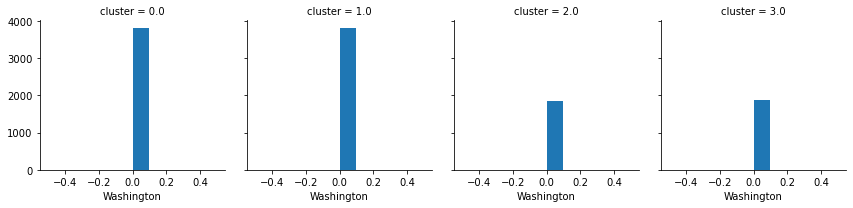

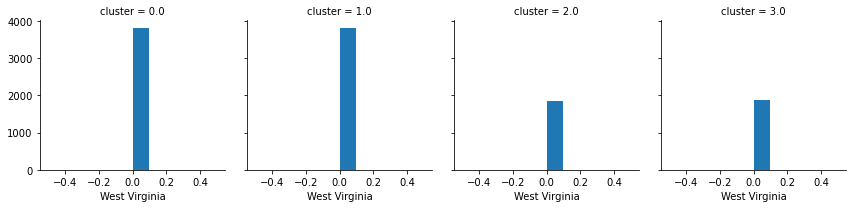

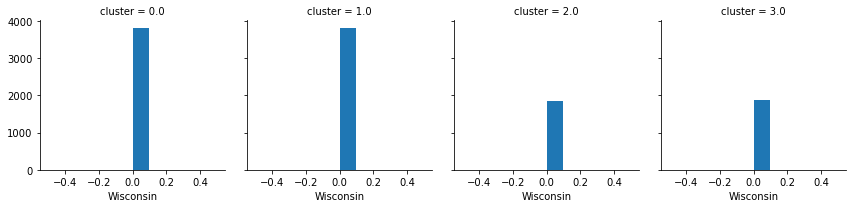

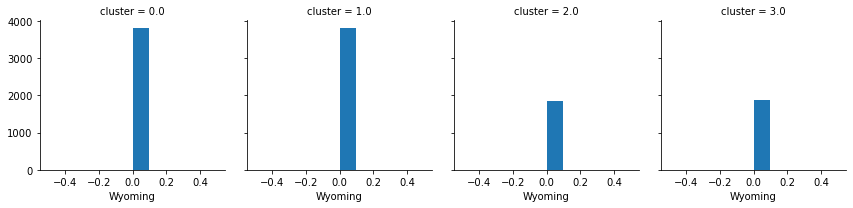

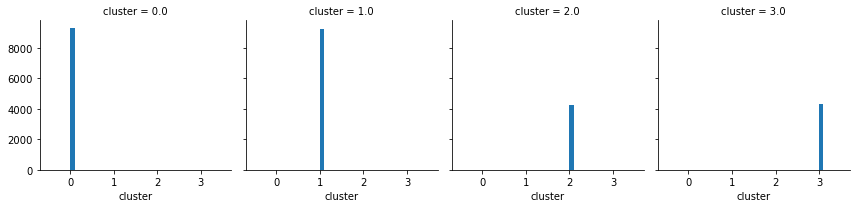

In [36]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

## Result

#### Cluster 0
- These are the people with maximum death rate.
- People are most affected in winters (December to March).
- Both males and females are equally imapcted by Covid in this group.
- People from age group 70-84 belong to this group.
- People from New York city and California fall in this category.
- This is the group that requires vaccinations before other people.

#### Cluster 1
- These are the people having intermediate death rates.

#### Cluster 2
- These are the people with least death rate.

#### Cluster 3
- These are the people having intermediate death rates.